# **Importing all the important Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
sns.set()



**Input Data**

In [2]:
data = pd.read_csv("./dataset/full.csv")

In [3]:
data.head(10) #view column of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0


In [4]:
data.shape #view the shape 

(1309, 21)

# **Perform data analysis**

<Axes: xlabel='Survived', ylabel='count'>

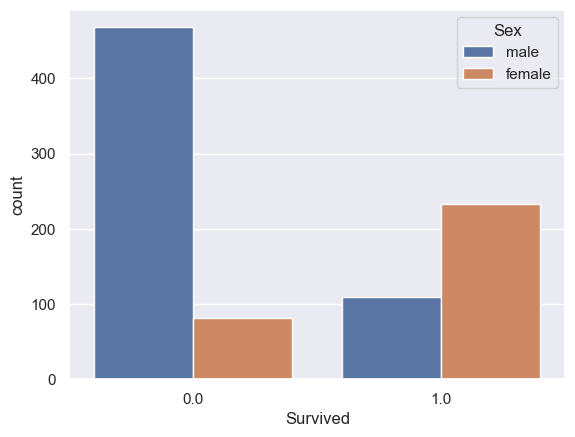

In [5]:
sns.countplot(x="Survived", hue = "Sex", data=data) #analysis with visulisation

<Axes: xlabel='Survived', ylabel='count'>

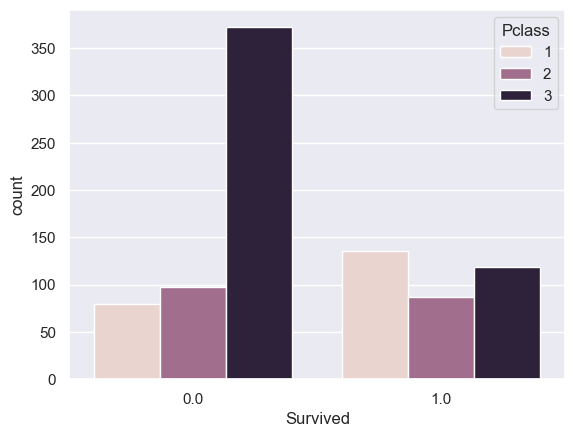

In [6]:
sns.countplot(x="Survived", hue = "Pclass", data=data)

<Axes: ylabel='Frequency'>

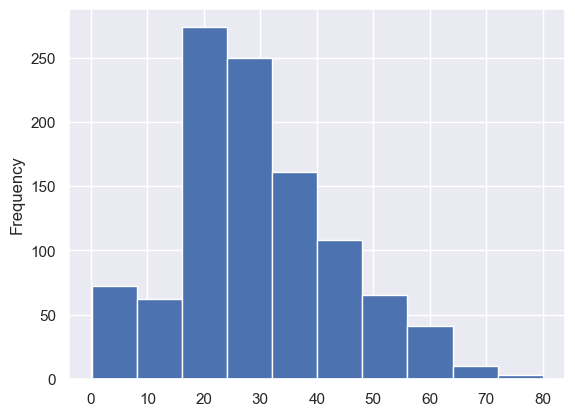

In [7]:
data["Age"].plot.hist()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

# Perfom data cleaning

In [9]:
data.isnull().sum() #lists of null values 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [10]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [11]:
data.drop(["Hometown",
           "Age_wiki",
           "Name_wiki", 
           "Ticket",
           "Cabin",
           "Destination",
           "Body",
           "WikiId", 
           "Name","Boarded",
           "Lifeboat",
           "Name",
           "PassengerId"],axis=1, inplace= True)

In [12]:
data.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
0,0.0,3,male,22.0,1,0,7.2500,S,3.0
1,1.0,1,female,38.0,1,0,71.2833,C,1.0
2,1.0,3,female,26.0,0,0,7.9250,S,3.0
3,1.0,1,female,35.0,1,0,53.1000,S,1.0
4,0.0,3,male,35.0,0,0,8.0500,S,3.0


In [13]:
data.dropna(inplace=True) #drop missing values

In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Class       0
dtype: int64

**handling categorial variables******

In [15]:
sex = pd.get_dummies(data["Sex"], drop_first=True)
embark = pd.get_dummies(data["Embarked"], drop_first=True)
clss = pd.get_dummies(data["Class"], drop_first=True)
data.drop('Pclass', axis=1,inplace=True)

In [16]:
data=pd.concat([data,sex,embark,clss], axis=1)
data.head(5)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Class,male,Q,S,2.0,3.0
0,0.0,male,22.0,1,0,7.2500,S,3.0,True,False,True,False,True
1,1.0,female,38.0,1,0,71.2833,C,1.0,False,False,False,False,False
2,1.0,female,26.0,0,0,7.9250,S,3.0,False,False,True,False,True
3,1.0,female,35.0,1,0,53.1000,S,1.0,False,False,True,False,False
4,0.0,male,35.0,0,0,8.0500,S,3.0,True,False,True,False,True


In [17]:
data.drop(["Sex","Embarked",'Class'],axis=1,inplace=True) 

In [18]:
data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2.0,3.0
0,0.0,22.0,1,0,7.2500,True,False,True,False,True
1,1.0,38.0,1,0,71.2833,False,False,False,False,False
2,1.0,26.0,0,0,7.9250,False,False,True,False,True
3,1.0,35.0,1,0,53.1000,False,False,True,False,False
4,0.0,35.0,0,0,8.0500,True,False,True,False,True


# Split the data for training

In [19]:
x=data.drop("Survived",axis=1) 
y=data["Survived"] 

In [20]:
x = pd.get_dummies(x, drop_first=True)
x = x.astype(float)
x.columns = x.columns.astype(str)  # <- fixes the float column names issue



x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [21]:
#model and train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
#perform predictions
predic = model.predict(x_test)

In [23]:
#Accuracy of the model
report = classification_report(y_test,predic)

In [24]:
print(report)

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       122
         1.0       0.82      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.81      0.79      0.80       214
weighted avg       0.81      0.80      0.80       214



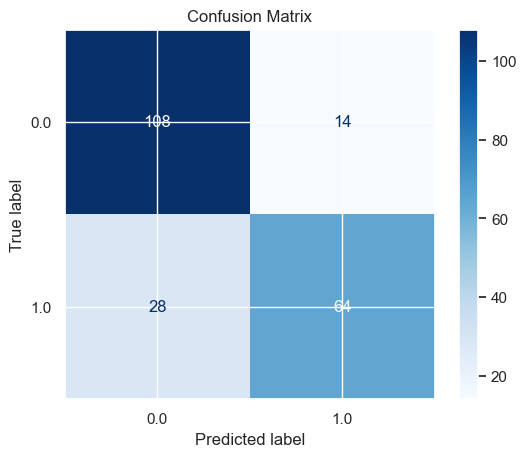

In [25]:

# Generate confusion matrix
cm = confusion_matrix(y_test, predic)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [26]:

accuracy_score(y_test, predic)

0.8037383177570093